
<h2><big><center> TP Optimisation</center></big></h2>
<a><medium><center>( khalil.bergaoui , aziz.ben-m-barek ) @student.ecp.fr</a></center></medium>

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy
from scipy.optimize import minimize 

## Partie 1 - Optimisation continue

#### 1.1.1 Résolution du problème primal

On résoud le problème pour N = 10, 100, 1000 et on obtient :

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt


def f(x):
    
    #x: array (x1, ...., xN)
    s = 0
    N = x.shape[0]
    for i in range(N):
        s+= np.exp(x[i])+ x[i]*(i+1)/N
        
    return s 

def h(x):
    
    epsilon = 1e-6 #à verifier (changer tolerance de l'algo)
    s=0
    N = x.shape[0]
    for i in range(N):
        s+= x[i]
        
    return s - 1 - epsilon


Ns =[10,100,1000]
def solve_primal(Ns):
    
f_opts=[]
times=[]
x_opts=[]
for N in Ns:
    print('solving for N ={}'.format(N))
    X0 = 1/N*np.ones((N,))
    begin_time = time.time()
    solving_dict = minimize(f,x0=X0, constraints = {'type':'ineq','fun':h})
    solving_time = time.time() -begin_time
    print ('Problem solved after = {}'.format(solving_time))
    times.append(solving_time)
    x_opt = solving_dict['x']
    x_opts.append(np.linalg.norm(x_opt))
    f_opts.append(f(x_opt))
    
    

f_opts, x_opts, x_opt =  solve_primal(Ns) 

solving for N =10
Problem solved after = 0.05112457275390625
solving for N =100
Problem solved after = 0.4720346927642822
solving for N =1000
Problem solved after = 51.09920382499695


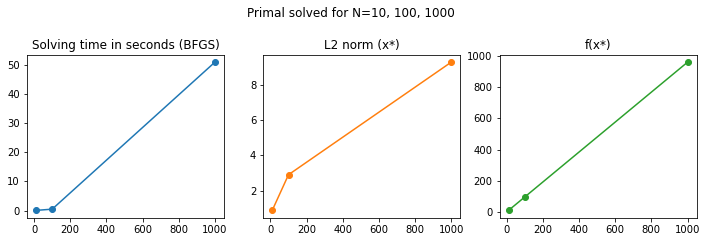

In [34]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
axs[0].plot(Ns,times, '-o')
axs[0].set_title('Solving time in seconds (BFGS)')
axs[1].plot(Ns,x_opts, '-o', color='tab:orange')
axs[1].set_title('L2 norm (x*)')
axs[2].plot(Ns,f_opts, '-o', color='tab:green')
axs[2].set_title('f(x*)')
tt= fig.suptitle('Primal solved for N=10, 100, 1000', y =1.1)


On observe que le temps de résolution ne crôit pas linéairement avec la taille du problème. 
D'où l'intérêt à recourir à d'autres méthodes pour des problèmes de taille assez large.

#### 1.1.1 Résolution du problème dual

Le problème dual revient à minimiser la fonction : 

$$
L(\lambda) = \lambda + \sum{(\lambda - p_i) +(p_i- \lambda)*log((\lambda - p_i)} \tag{$p_i = i/N$}\\
\lambda \geq 1 = \max_{1 \leq i \leq N} p_i
$$

et à ensuite prendre le minimiseur tel que: $$ x_i = log((\lambda - p_i) \forall 1 \leq i \leq N$$

In [36]:
def L(l,N):
    s=0
    for i in range(N):
        p =(i+1)/N
        s+= (l - p) + (p-l)*np.log(l-p)
        
    return -(s +l)

def contrainte_de_borne(x):
    return x -1

def get_x(l,N):
    x=np.zeros((N,))
    for i in range(N):
        x[i]= np.log(l-(i+1)/N) 
    return x

def compare_primal_dual(Ns):
    
    x_opt={'primal':[],'dual':[]}
    f_opt={'primal':[],'dual':[]}
    solv_time={'primal':[],'dual':[]}
    for N in Ns:
        print('Solving for N={}'.format(N))
        X0 = 1/N*np.ones((N,))
        l0 = 2
        begin_time = time.time()
        primal_solution = minimize(f,x0=X0, constraints = {'type':'ineq','fun':h})
        primal_time = time.time() - begin_time
        print('Primal solved in ={}'.format(primal_time))
        dual_solution = minimize(L,args=(N),x0=l0, constraints = {'type':'ineq','fun':contrainte_de_borne})
        dual_time = time.time() -primal_time -begin_time
        print('Dual solved in ={}'.format(dual_time))
        
        x_primal = primal_solution['x']
        x_dual = get_x(dual_solution['x'],N)
        x_opt['primal'].append(x_primal)
        x_opt['dual'].append(x_dual)
        f_opt['primal'].append(f(x_primal))
        f_opt['dual'].append(f(x_dual))
        solv_time['primal'].append(primal_time)
        solv_time['dual'].append(dual_time)
    
    return x_opt, f_opt, solv_time


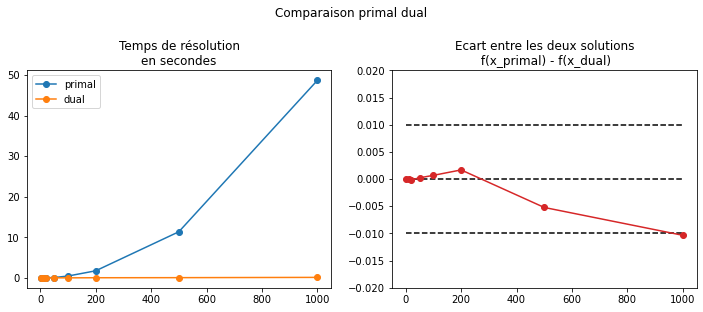

In [59]:

# Résoudre le problème primal et dual puis comparer pour différentes valeurs de la taille du problème N
Ns = [2,10,20,50,100,200,500,1000]
x_opt, f_opt, solv_time = compare_primal_dual(Ns)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Temps de résolution\nen secondes')
plt.plot(Ns,solv_time['primal'],'-o',label='primal')
plt.plot(Ns,solv_time['dual'],'-o',label='dual')
plt.legend()

plt.subplot(1,2,2)
plt.title('Ecart entre les deux solutions\n f(x_primal) - f(x_dual)')
plt.plot(Ns,np.array(f_opt['primal'])-np.array(f_opt['dual']),'-o',color='tab:red')
plt.ylim(-0.02,0.02)
plt.hlines(y=[0,-0.01,0.01],xmin=1,xmax=1000, ls='--')

tt= plt.suptitle('Comparaison primal dual', y =1.1)

- La figure de gauche le gain en terme de temps de résolution : La méthode duale est beaucoup plus rapide et le temps de résolution reste quasiment négligeable pour des problèmes de taille N=1000.

- Sur la figure de droite, on voit bien que les solutions sont comparables (à 10e-3 près pour N=10 et 10e-2 près pour N=1000) le minimum trouvé par le problème dual restant supérieur au minimum trouvé par le problème primal pour des valeur de N supérieures à 200.

Résoudre la forme duale du problème d'optimisation est alors une meilleure stratégie en pratique .

## Partie 2  - Optimisation discrète

####  2.3   Approvisionnement d'un chantier

On propose de résodre le problème par programmation dynamique.

<u>*Formulation du problème*</u>:

Soient $s_t$ le stock d'engins disponible et $d_t$ la demande nécessaire pour la semaine t avec $1\leq t \leq N$.

On désigne par $ c_t(s_t)$ le coût total cumulé jusqu'à la semaine t. Alors on a les relations de récurrences suivantes :


$\forall t 1\leq t \leq N$

$\forall s_t \in E_t ,  s_{t-1} \in E_{t-1}$

\begin{align}
c_t(s_t) = c_{t-1}(s_{t-1}) + p_{loc}*s_t + p_{init}*max(0,s_t-s_{t-1}) + p_{fin}*max(0,s_{t-1}-s_t) \tag{*}\\
\end{align}


L'esnsemble des états possibles verifiant les contraintes imposées :

\begin{cases}
E_t = \{ d_t, ..., max( d_t, \max_{0 \leq t \leq 1} E_{t-1}) \} \tag{$1\leq t\leq N-1$}\\
E_0 =\{s_0 = 0\} \\
E_N =\{s_N = d_N\} 
\end{cases}

En effet, si à le semaine t-1 on dispose de $s_{t-1}$ engins tels que $s_{t-1}\leq d_t$ on a nécessairement $s_t = d_t$. 

Sinon $s_t$ peut prendre toutes les valeurs possibles entre $s_{t-1}$ (conserver le stock) et $d_t$ ( vendre l'excès de stock). 



 **Une stratégie optimale minimise donc le côut total cumulé $c_N(d_N)$.**
 
 Ci dessous l'implémentation de la solution.
 Pour chaque semaine, pour chaque valeur possible du stock, on calcule tous les chemins possibles (stocks des semaines précedentes) et on ne garde que le chemin optimal. Le chemin final à la semaine N passera donc par les noeuds optimaux des semaines précedentes. 
 
La solution finale est alors optimale. On trouve une valeur minimale du coût égale à 2 899 400 .
 
<u>Remarque</u> : Pour chaque noeud, plusieurs chemins optimaux peuvent exister (correspondant au même coût optimal). La solution proposée (stratégie d'approvisionnement) est alors optimale mais pas unique.
 

In [211]:

#Programmation dynamique

def cost(n,p_loc,p_init,p_fini,demand):
    """
    Fonction récursive qui implémente la relation de récurrence (*)
    et retourne un dictionnaire dans le quel on enregistre pour
    chaque semaine le meilleur noeud (stock,cout cumulé) et le noeud parent de la semaine
    précedente. 
    Le dictionnaire sera utilisé pour reconstruire le chemin optimal, dans la
    fonction get_optimal_path_cost().
    """
    
    # Initializer les variables de la première semaine afin de satisfaire les contraintes à t=0
    if n==0:
        current_stock = demand[0]
        current_cost = current_stock*(p_loc+p_init)
        previous_stock = 0
        previous_cost = 0
        return {n:{'path':{(current_stock,current_cost):(previous_stock,previous_cost)},'max':current_stock}}
        
    
    else:
        
        # Accéder aux états possibles de la semaine qui précède
        all_prev_paths = cost(n-1,p_loc,p_init,p_fini,demand)
        prev_path = all_prev_paths[n-1]['path'] # List of dictionaries 
        prev_max_stock = all_prev_paths[n-1]['max']
        
        #Définir les bornes min et max des l'intervalle En des états possibles à la semaine n
        current_max = max(demand[n],prev_max_stock) 
        current_min = demand[n]
        
        #Imposer le stock de la dernière semaine
        if n==len(demand)-1:
            current_max = demand[n]
                
        
        
        #Initializer le dictionnaire
        possible_stocks = {}
        
        #Parcourir l'ensemble des états possibles
        for possible_current_stock in range(current_min,current_max+1):
            best_cost = np.inf
                
            for previous_state in prev_path:
                previous_stock = previous_state[0]
                previous_cost = previous_state[1]
                
                init_cost = p_init*max(0,possible_current_stock-previous_stock)
                loc_cost = p_loc*possible_current_stock
                fini_cost = p_fini*max(0,previous_stock-possible_current_stock)
                current_cost = previous_cost +loc_cost+fini_cost+init_cost
                    

                if current_cost < best_cost:
                    best_cost = current_cost
                    best_previous_stock = previous_stock
                    best_previous_cost = previous_cost
            
            #Mettre à jour le dictionnaire avec l'état qui correspond au coût cumulé minimal à la semaine n
            possible_stocks.update({(possible_current_stock,best_cost):(best_previous_stock,best_previous_cost)})


        all_prev_paths.update({n:{'path':possible_stocks,'max':current_max}})
        return all_prev_paths
                
                
def get_optimal_path_cost(recursion_results,n,demand):
    """
    Retourne une liste avec la strategie optimale d'approvisionnement
    
    @recursion_results: dictionnaire obtenue par la fonction recursive cost()
    """
    optimal_cost = min(np.array([k[1] for k in recursion_results[n]['path']]))
    path =[demand[n]]
    prev_key = (demand[n],optimal_cost)
    for i in range(n):
        k = n-i
        prev_key = recursion_results[k]['path'][prev_key]
        path.insert(0,prev_key[0])
    return path

def get_demand_list(filename):
    """
    Charger le fichier contenant les données pour la demande
    et retourner une liste des valeurs correspondants à chaque semaine.
    """
    with open(filename) as f:
        content = f.readlines()
    sep = '   '
    l = content[0].split(sep)
    N = len(l)
    
    return [int(np.float(l[i].strip('\n'))) for i in range(1,N) ]



Text(0.5, 1.0, 'optimal cost = 2899400')

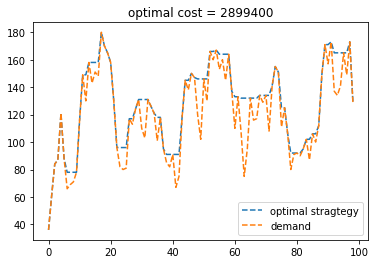

In [219]:
# Charger les données à partir du fichier
filename = 'DonneesEnginsChantier.txt'
demand = get_demand_list(filename)

#Parametres donnés
p_init = 800
p_loc = 200
p_fin = 0 


n = len(demand)-1
# Calculer le coût optimal
recursion_results = cost(n,p_loc,p_init,p_fin,demand)
optimal_cost = list(recursion_results[n]['path'].keys())[0][1]
# Récuperer le chemain correspondant (taille du stock pour chaque semaine)
optimal_path = get_optimal_path_cost(recursion_results,n,demand)

#Visualizer la stratégie d'approvisionnement

plt.plot(optimal_path,'--',label = 'optimal stragtegy')
plt.plot(demand,'--',label='demand')
plt.legend()
tt= plt.title('optimal cost = {}'.format(optimal_cost))

##  Partie 3 -  Optimisation multi - objectif

#### Méthode gloutonne

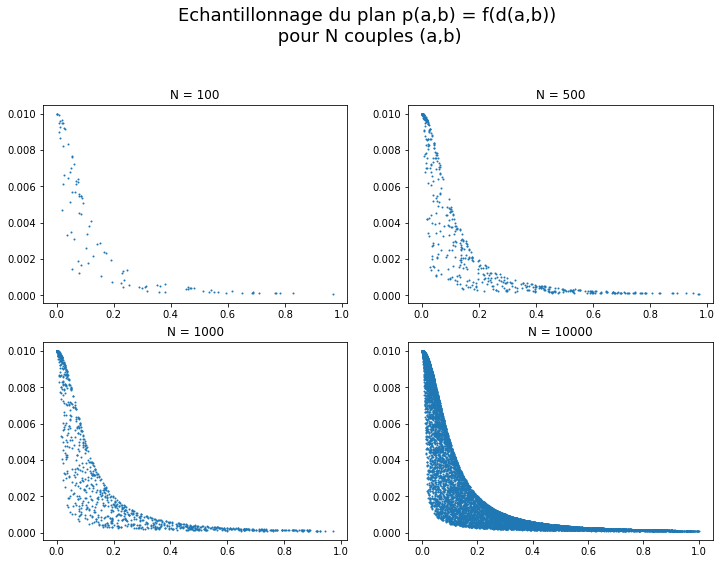

In [4]:
def p_(a,b):
    return a*a - b*b

def d_(a,b):
    return 1e-4 /(1e-2+a**4-b**4)



def gloutonne(a_inf,a_sup,N):
    """
    Retourne 3 listes :
    p, d : listes de même taille @N contenat les valeurs respectives du poids et deflexion des N points (a,b)
    utilisés pour échantilloner le plan (p,d)
    
    parcours: Liste contenant les points candidats pour déterminer le front de pareto 
    """
    p=[]
    d=[]
    parcours =[] # Les point qu'on va parcourir pour construire le front de pareto

    for i in range(N):
        
        #Tirer au hasard un point de l'espace
        a = np.random.uniform(a_inf,a_sup)
        b = np.random.uniform(0,a-0.01)
        #Calculer et sauvegarder le poids, la déflexion
        p.append(p_(a,b))
        d.append(d_(a,b))
        
        #Si le nouveau point n'est dominé par aucun point précedemment tiré
        #On le rajoute à la liste parcours et on mets à jour les nouveaux minimas du poids et de déflexion
        if i==0:
            best_a = a
            best_b = b
        else:
            if p_(a,b)< p_(best_a,best_b) or d_(a,b)< d_(best_a,best_b) :
                best_a = a
                best_b = b
                parcours.append((a,b))
    
    
    return parcours , p, d

def pareto(parcours):
    """
    Calcule le front de pareto de rang 1 à partir de la liste fornie en entrée
    @parcours: liste retournée par la méthode gloutonne()
    """
    pareto_points_p=[]
    pareto_points_d = []
    
    
    #Parcourir la liste pour récupérer le front de pareto de rang 1
    for point_1 in parcours:
        p1= p_(point_1[0],point_1[1])
        d1= d_(point_1[0],point_1[1])
        point_1_dominé = False
        
        #Chercher au moins un point qui domine le point_1
        for point_2 in parcours:
            if (p_(point_2[0],point_2[1]) < p1 and d_(point_2[0],point_2[1])<=d1) or  (p_(point_2[0],point_2[1]) <= p1 and d_(point_2[0],point_2[1])<d1):
                
                # Condition satisfaite si point_2 domine point_1
                point_1_dominé = True
                break
                
        if point_1_dominé == False:
            pareto_points_p.append(p1)
            pareto_points_d.append(d1)
    return pareto_points_p,pareto_points_d


def plot_goutonne(N_list):
    """
    Visualize l'échantillonnage de l'espace par la méthode gloutonne
    @N_list: liste avec des valeurs des nombres de points utilisés pour l'échantillonnage
    """
    plt.figure(figsize=(12,8))
    for i,N in enumerate(N_list):
        parcours,p,d = gloutonne(a_inf,a_sup,N)
        plt.subplot(2,2,i+1)
        parcours, p,d = gloutonne(a_inf,a_sup,N)
        plt.scatter(p,d,s=1)
        plt.title('N = {}'.format(N))
    plt.suptitle('Echantillonnage du plan p(a,b) = f(d(a,b))\n pour N couples (a,b)', y=1.05, fontsize = 18)

    
a_inf = 0.02
a_sup = 1

#Comparer les résultats de l'échantillonnage du plan (p,d) pour 4 valeurs de N
N_list = [100,500,1000,10000]
plot_goutonne(N_list)

Plus N est grand, plus on a une description fine de l'espace.

Cependant la construction du front de pareto devient plus lente. En effet, plus on a des points dans l'espace, plus la verification de la condition de domination devient coûteuse pour chaque point.

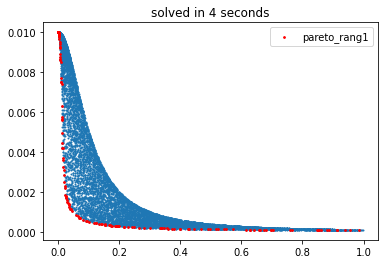

In [5]:


begin = time.time()
#Echantilloner le plan avec 10000 points
parcours,p,d = gloutonne(a_inf,a_sup,10000)
#Récupérer le front de pareto de rang 1
r1_p, r1_d = pareto(parcours)
end = time.time()

#Visualizer
plt.scatter(p,d,s=1)
plt.scatter(r1_p,r1_d,s=3,color='r',label = 'pareto_rang1')
plt.legend()
tt =plt.title('solved in {} seconds'.format(int(end-begin)))

Le front de pareto de rang 1 construit à partir de N =10000 points présente quelques trous,dues au sous-échantillonnage du plan, mais on peut conlure qu'il est bien convexe.

Pour obtenir une meilleur approximation, on refait la même expérience en multipliant par 10 le nombre de points. (N =100 000). Le résultat, illustré ci-dessous, est obtenu après 255 secondes : l'éxecution est 36 fois plus coûteuse que la précedente (avec N= 10 000) :

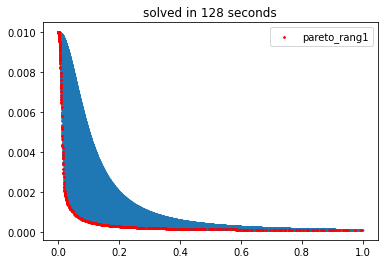

In [6]:
begin = time.time()

#Echantilloner le plan avec 100000 points
parcours,p,d = gloutonne(a_inf,a_sup,100000)
#Récupérer le front de pareto de rang 1
r1_p, r1_d = pareto(parcours)
end = time.time()

#Visualiser
plt.scatter(p,d,s=1)
plt.scatter(r1_p,r1_d,s=3,color='r',label = 'pareto_rang1')
plt.legend()
glouton_time = int(end-begin)
tt =plt.title('solved in {} seconds'.format(glouton_time))

#### Méthode plus sophistiquée

Le front de pareto étant convexe, on peut transformer le problème à une optimisation mono-objectif paramétrée.

On résoud alors, en faisant varier le paramètre $\alpha$, la fonction monoobjectif suivante: $$ J(\alpha) = p + \alpha * d$$ 

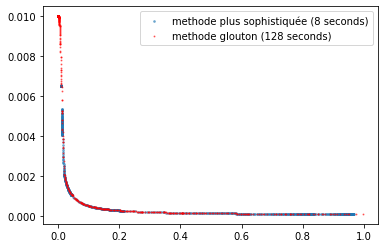

In [9]:
# Fonction monoobjectif
def mono_objectif(x,alpha):
    a,b = x[0],x[1]
    return p_(a,b)+alpha*d_(a,b)


#Definir les contraintes comme inegalités positives
def c_(x):
    c1 = x[0] - 0.02
    c2 = 1-x[0]
    c3 = x[1]
    c4 = x[0] - x[1] - 0.01
    return np.array([c1,c2,c3,c4])


def sophistiquée(X0):

    ps =[]
    ds =[]
    

    # Extremités des intervalles pour les valeurs de alpha
    sampling_intervals = [1,1.3,1.4,2,10,50,1000,10000,30000,150000]

    #Parcourir les intervalles definis ci-dessus
    for j in range(len(sampling_intervals)-1):
        interval_max = sampling_intervals[j+1]
        interval_min = sampling_intervals[j]
        
        if j<2:
            #Echantillonage plus fin des deux premiers intervalles
            #(car la pente varie plus rapidement)
            sampling_size = 1000
        else:
            sampling_size =100
        
        #Pas de l'échantillonnage de l'intervalle courant
        step = (interval_max-interval_min)/sampling_size
        for i in range(sampling_size+1):
            
            alpha = i*step + interval_min
            #Minimiser la fonction monobjectif pour la valeur courante de alpha 
            solving = minimize(mono_objectif,args=(alpha),x0=X0, constraints = {'type':'ineq','fun':c_})
            x_opt = solving['x']
            #Sauvegarder le poids et la déflection du minimiseur
            ps.append(p_(x_opt[0],x_opt[1]))
            ds.append(d_(x_opt[0],x_opt[1]))
            
    return ps,ds


X0 = (0.5,0.5) # Initialization de la minimization du monoobjectif
#Résoudre par la méthode plus sophistiquée
begin = time.time()  
p_soph,d_soph = sophistiquée(X0)
end = time.time()
ms_time =int(end-begin)

#Visualizer et comparer les fronts de pareto construits par les deux méthodes
plt.scatter(p_soph,d_soph,s=3,alpha=0.5,label ='methode plus sophistiquée ({} seconds)'.format(ms_time))
plt.scatter(r1_p,r1_d,s=1,color='r',label = 'methode glouton ({} seconds)'.format(glouton_time),alpha =0.5)
lg =plt.legend()

On constate une parcimonie de la courbe bleue que pour des valeurs de l'axe des ordonnées entre (0.006, 0.01). A priori, cela peut s'intérpréter par un sous échantillonage de cette région (i.e variation rapide de la pente $\frac{1}{\alpha}$). 

Par contre, en analysant les valeurs du paramètre dans cette zone, on remarque que pour $\alpha = 1.3$ la solution optimale correspond au point $(3e-4,1e-2)$ dans le plan (p,d) et pour $\alpha = 1.4$ on a un saut au point de coordonnées $(1e-2,6e-3)$ . 

La parcimonie observée n'est donc pas une conséquence d'un sous-échantillonage. Une intérpretation possible est que la solution optimale de la fonction monoobjectif autour de ce point $\alpha = 1.4$ est instable.

Ainsi, si on cherche à déterminer le front de pareto sous contrainte que la déflexion maximale de la poutre soit inférieure à 0.05, la méthode plus sophistiquée est aussi fiable et beaucoup moins coûteuse que la méthode gloutonne. Par contre sous la contrainte de borne maximale sur le poids de la poutre, la méthode gloutonne est préferable, car permet de construire un front de pareto plus précis.